# GRU

In [ ]:

from tensorflow.keras.layers import GRU

# Define the model
model_gru = Sequential([
    GRU(128, return_sequences=True, input_shape=(TIME_STEPS, FEATURES)),  # First LSTM layer
    Dropout(0.2),  # Dropout to prevent overfitting
    GRU(64, return_sequences=True),  # Second LSTM layer
    Dropout(0.2),
    GRU(32),  # Final LSTM layer
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.2),
    Dense(13, activation='softmax')  # Output layer (adjust 13 based on your classes)
])

# Compile the model
model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Define the learning rate scheduler
lr_scheduler2 = ReduceLROnPlateau(
    monitor='val_loss',    # Monitor validation loss
    factor=0.5,            # Reduce learning rate by half
    patience=3,            # Wait for 3 epochs before reducing
    min_lr=1e-6,           # Set a lower bound for learning rate
    verbose=1              # Print updates
)

# Train LSTM model with the callback
history_gru = model_gru.fit(
    X_train_seq, y_train_seq,
    epochs=50, batch_size=32,
    validation_split=0.2,
    callbacks=[lr_scheduler2]  # Add the callback here
)



D:\ICT\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
855/855 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.3376 - loss: 1.9420 - val_accuracy: 0.6736 - val_loss: 1.0188 - learning_rate: 0.0010
Epoch 2/50
855/855 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - accuracy: 0.6806 - loss: 1.0005 - val_accuracy: 0.7484 - val_loss: 0.7409 - learning_rate: 0.0010
Epoch 3/50
855/855 ━━━━━━━━━━━━━━━━━━━━ 43s 47ms/step - accuracy: 0.7513 - loss: 0.7347 - val_accuracy: 0.8054 - val_loss: 0.5497 - learning_rate: 0.0010
Epoch 4/50
855/855 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.7995 - loss: 0.5878 - val_accuracy: 0.8202 - val_loss: 0.5212 - learning_rate: 0.0010
Epoch 5/50
855/855 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - accuracy: 0.8255 - loss: 0.5057 - val_accuracy: 0.8290 - val_loss: 0.4914 - learning_rate: 0.0010
Epoch 6/50
855/855 ━━━━━━━━━━━━━━━━━━━━ 45s 52ms/step - accuracy: 0.8380 - loss: 0.4653 - val_accuracy: 0.8738 - val_loss: 0.3827 - learning_rate: 0.0010
Epoch 7/50
855/855 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - accuracy: 0.8643 - l

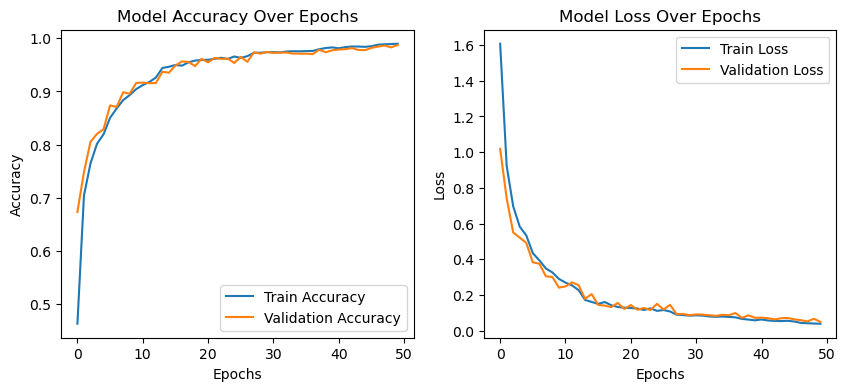

In [ ]:


# Load the saved training history
history_data = history_gru.history

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_data['accuracy'], label='Train Accuracy')
plt.plot(history_data['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_data['loss'], label='Train Loss')
plt.plot(history_data['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss Over Epochs")

plt.show()


In [ ]:
# Evaluate full models
print("Evaluating Full GRU Model:")
evaluate_model(model_gru, X_test_seq, y_test_seq)

Evaluating Full GRU Model:
268/268 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Accuracy: 98.50%
F1-score: 98.49%
Inference Time: 0.496 ms/sample


(98.5020479812756, 98.48949669967772, 0.49622559700882735)

In [ ]:
# Save the trained RNN model
#model_rnn.save("rnn_model.h5")  # Saves in HDF5 format
model_gru.save("gru_model_50epoch.keras")
# save the history of the model
np.save("gru_training_history_50epoch.npy", history_gru.history)

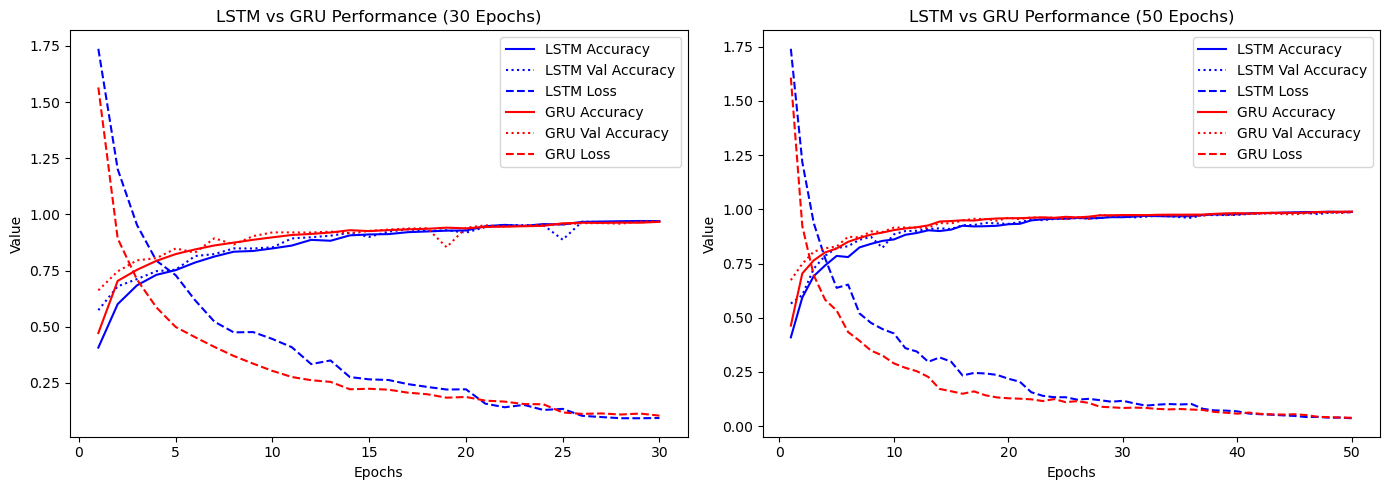

In [ ]:
# comparing model performances

import numpy as np
import matplotlib.pyplot as plt

# Load the saved training history
history_lstm_30 = np.load("lstm_training_history_30epoch.npy", allow_pickle=True).item()
history_gru_30 = np.load("gru_training_history_30epoch.npy", allow_pickle=True).item()
history_lstm_50 = np.load("lstm_training_history_50epoch.npy", allow_pickle=True).item()
history_gru_50 = np.load("gru_training_history_50epoch.npy", allow_pickle=True).item()

epochs_30 = range(1, 31)
epochs_50 = range(1, 51)

# Create the figure with 2 plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 📌 Graph 1: LSTM vs GRU (30 epochs)
axes[0].plot(epochs_30, history_lstm_30['accuracy'], label='LSTM Accuracy', color='blue')
axes[0].plot(epochs_30, history_lstm_30['val_accuracy'], label='LSTM Val Accuracy', linestyle='dotted', color='blue')
axes[0].plot(epochs_30, history_lstm_30['loss'], label='LSTM Loss', linestyle='dashed', color='blue')

axes[0].plot(epochs_30, history_gru_30['accuracy'], label='GRU Accuracy', color='red')
axes[0].plot(epochs_30, history_gru_30['val_accuracy'], label='GRU Val Accuracy', linestyle='dotted', color='red')
axes[0].plot(epochs_30, history_gru_30['loss'], label='GRU Loss', linestyle='dashed', color='red')

axes[0].set_title("LSTM vs GRU Performance (30 Epochs)")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Value")
axes[0].legend()

# 📌 Graph 2: LSTM vs GRU (50 epochs)
axes[1].plot(epochs_50, history_lstm_50['accuracy'], label='LSTM Accuracy', color='blue')
axes[1].plot(epochs_50, history_lstm_50['val_accuracy'], label='LSTM Val Accuracy', linestyle='dotted', color='blue')
axes[1].plot(epochs_50, history_lstm_50['loss'], label='LSTM Loss', linestyle='dashed', color='blue')

axes[1].plot(epochs_50, history_gru_50['accuracy'], label='GRU Accuracy', color='red')
axes[1].plot(epochs_50, history_gru_50['val_accuracy'], label='GRU Val Accuracy', linestyle='dotted', color='red')
axes[1].plot(epochs_50, history_gru_50['loss'], label='GRU Loss', linestyle='dashed', color='red')

axes[1].set_title("LSTM vs GRU Performance (50 Epochs)")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Value")
axes[1].legend()

plt.tight_layout()
plt.show()
